In [113]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Project Description



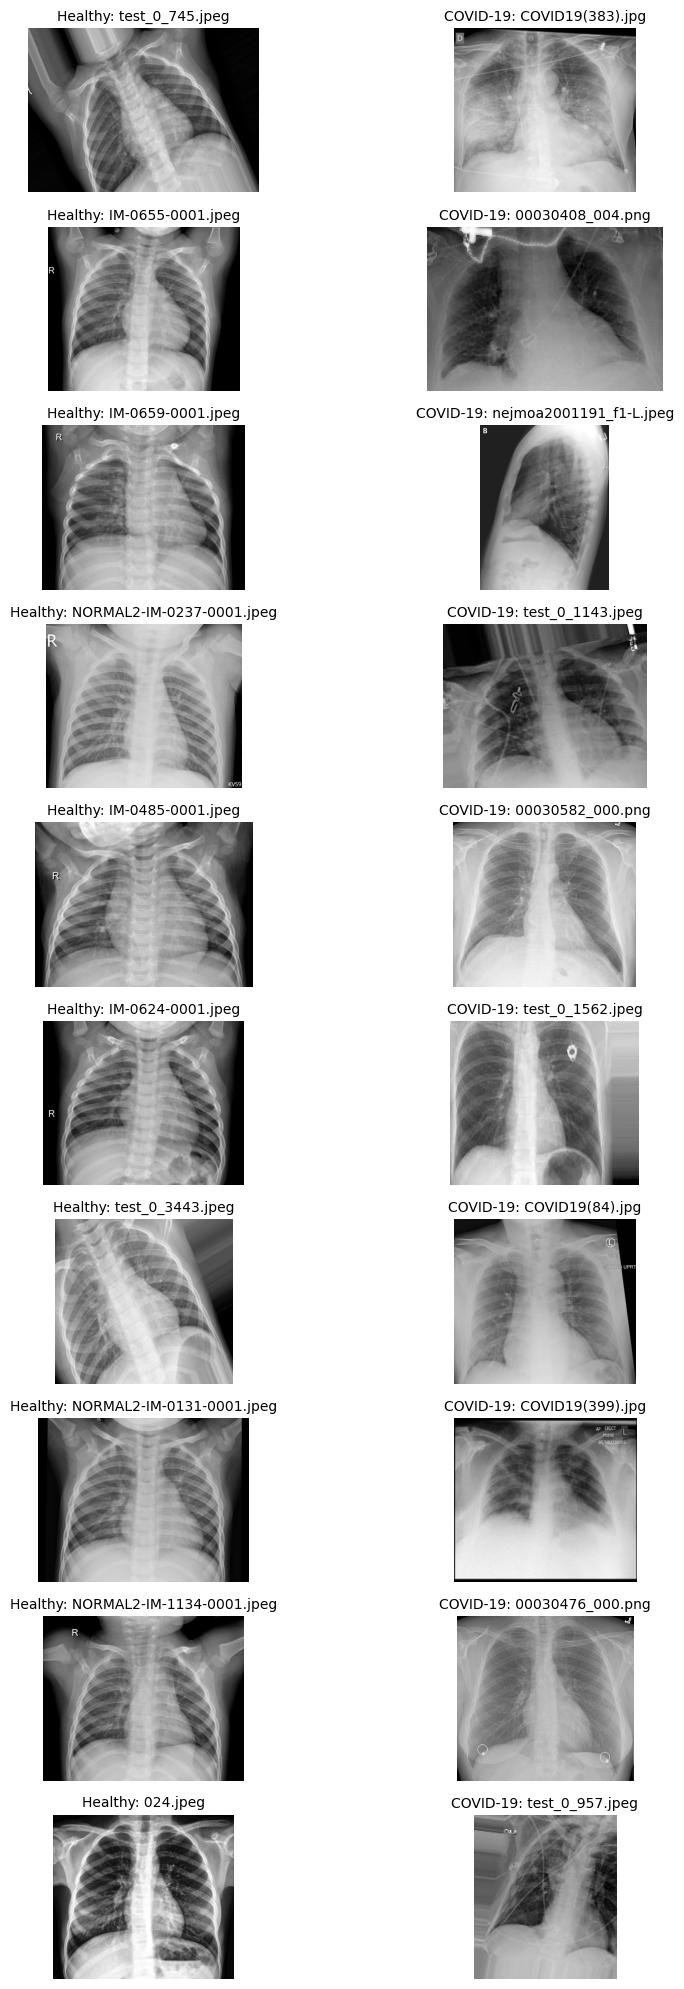

In [116]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
from skimage.feature import graycomatrix, graycoprops

# Function to load an image from a given path
def load_image(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Function to calculate histogram features
def histogram_features(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    return np.squeeze(hist)

# Function to calculate texture features using GLCM
def texture_features(image):
    glcm = graycomatrix(image, [1], [0, np.pi/2], 256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')
    dissimilarity = graycoprops(glcm, 'dissimilarity')
    homogeneity = graycoprops(glcm, 'homogeneity')
    energy = graycoprops(glcm, 'energy')
    return np.squeeze(np.array([contrast, dissimilarity, homogeneity, energy]))

# Function to calculate edge features using Sobel operator
def edge_features(image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    return np.sum(np.hypot(sobelx, sobely))

# Function to calculate color grading features
def color_grading_features(image):
    mean_intensity = np.mean(image)
    std_intensity = np.std(image)
    return mean_intensity, std_intensity

# Function to analyze an image and extract features
def analyze_image(image):
    if image is None:
        return np.array([np.nan] * 263)  # Adjust the number based on total features

    hist_feat = histogram_features(image).flatten()
    text_feat = texture_features(image).flatten()
    edge_feat = edge_features(image)
    color_feat = color_grading_features(image)

    # Ensure color_feat is a flat array
    color_feat = np.array(color_feat).flatten()

    combined_features = np.concatenate((hist_feat, text_feat, [edge_feat], color_feat))
    return combined_features


# Modified function definition with a default value for 'other_features_threshold'
def classify_image(features, threshold, other_features_threshold=0):
    intensity_features = features[-2:]  # Assuming last two features are intensity-related
    other_features = features[:-2]

    intensity_score = np.mean(intensity_features)
    other_features_score = np.mean(other_features)

    if intensity_score > threshold and other_features_score > other_features_threshold:
        return "COVID-19 Positive"
    else:
        return "Healthy"


# Function to select random images from a folder
def select_random_images(folder_path, num_images, valid_extensions=(".jpg", ".jpeg", ".png")):
    if not os.path.exists(folder_path):
        print(f"Error: Folder '{folder_path}' does not exist.")
        return []

    all_files = [f for f in os.listdir(folder_path) if f.lower().endswith(valid_extensions)]
    selected_files = random.sample(all_files, min(num_images, len(all_files)))
    return [os.path.join(folder_path, f) for f in selected_files]

# Define number of images to process and folder paths
num_random_images = 10  # Adjust as needed
healthy_folder_path = "./Normal"  # Folder for healthy images
covid_folder_path = "./Corona Virus Disease"  # Folder for COVID-19 images

# Select random images from each folder
healthy_image_paths = select_random_images(healthy_folder_path, num_random_images)
covid_image_paths = select_random_images(covid_folder_path, num_random_images)

# Define threshold for classification
adjusted_threshold = 1

# Visualization
num_rows = max(len(healthy_image_paths), len(covid_image_paths))
num_cols = 2  # One for healthy, one for COVID-19
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 20))  # Adjust figure size as needed

# Plot Healthy Images
for i, image_path in enumerate(healthy_image_paths):
    image = load_image(image_path)
    if image is not None:
        features = analyze_image(image)
        classification = classify_image(features, adjusted_threshold)
        ax = axes[i, 0]  # First column for healthy images
        ax.imshow(image, cmap='gray')
        ax.set_title(f"Healthy: {os.path.basename(image_path)}", fontsize=10)  # Adjust fontsize as needed
        ax.axis('off')
    else:
        print(f"Warning: Unable to load image {image_path}")

# Plot COVID-19 Images
for i, image_path in enumerate(covid_image_paths):
    image = load_image(image_path)
    if image is not None:
        features = analyze_image(image)
        classification = classify_image(features, adjusted_threshold)
        ax = axes[i, 1]  # Second column for COVID-19 images
        ax.imshow(image, cmap='gray')
        ax.set_title(f"COVID-19: {os.path.basename(image_path)}", fontsize=10)  # Adjust fontsize as needed
        ax.axis('off')
    else:
        print(f"Warning: Unable to load image {image_path}")



# Adjust layout for better readability
plt.tight_layout()
plt.show()




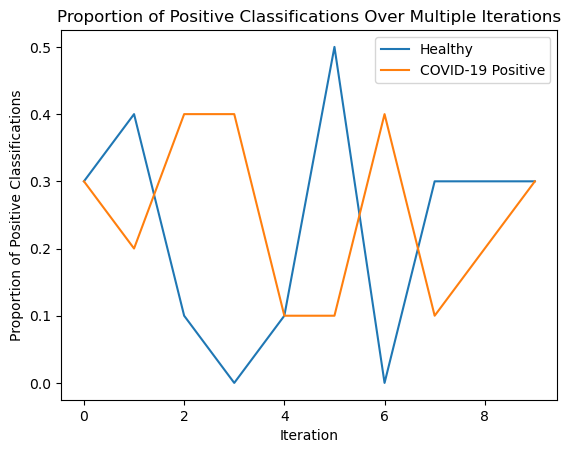

In [117]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
from skimage.feature import graycomatrix, graycoprops

# Function to perform analysis on images from a folder multiple times
def analyze_folder_multiple_times(folder_path, threshold, num_images, num_iterations):
    results = []
    for _ in range(num_iterations):
        image_paths = select_random_images(folder_path, num_images)
        folder_results = []
        for image_path in image_paths:
            image = load_image(image_path)
            if image is not None:
                features = analyze_image(image)
                classification = classify_image(features, threshold)
                folder_results.append((classification == "COVID-19 Positive"))
        results.append(folder_results)
    return np.array(results)

# Function to visualize the aggregated results
def visualize_results(healthy_results, covid_results):
    healthy_mean = np.mean(healthy_results, axis=1)
    covid_mean = np.mean(covid_results, axis=1)

    plt.plot(healthy_mean, label='Healthy')
    plt.plot(covid_mean, label='COVID-19 Positive')
    plt.xlabel('Iteration')
    plt.ylabel('Proportion of Positive Classifications')
    plt.title('Proportion of Positive Classifications Over Multiple Iterations')
    plt.legend()
    plt.show()

# Define parameters for analysis
num_iterations = 10
adjusted_threshold = 100

# Analyze each folder multiple times
healthy_results = analyze_folder_multiple_times(healthy_folder_path, adjusted_threshold, num_random_images, num_iterations)
covid_results = analyze_folder_multiple_times(covid_folder_path, adjusted_threshold, num_random_images, num_iterations)

# Visualize the results
visualize_results(healthy_results, covid_results)


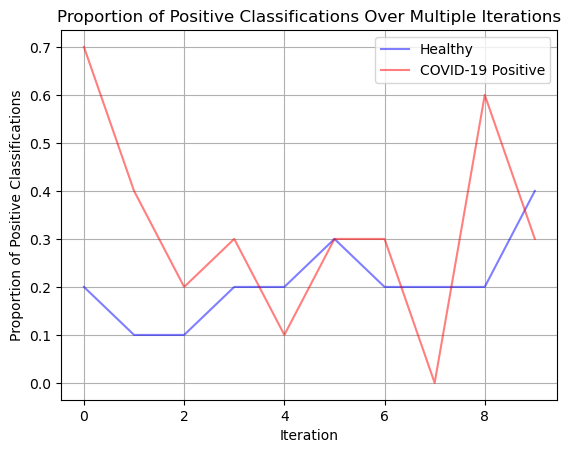

In [118]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
from skimage.feature import graycomatrix, graycoprops

# [Existing functions: load_image, histogram_features, texture_features, edge_features, color_grading_features, analyze_image, classify_image, select_random_images]

# Function to perform analysis on images from a folder multiple times
def analyze_folder_multiple_times(folder_path, threshold, num_images, num_iterations):
    results = []
    for _ in range(num_iterations):
        image_paths = select_random_images(folder_path, num_images)
        folder_results = []
        for image_path in image_paths:
            image = load_image(image_path)
            if image is not None:
                features = analyze_image(image)
                classification = classify_image(features, threshold)
                folder_results.append((classification == "COVID-19 Positive"))
        results.append(folder_results)
    return np.array(results)

# Function to visualize the aggregated results
def visualize_results(healthy_results, covid_results):
    healthy_mean = np.mean(healthy_results, axis=1)
    covid_mean = np.mean(covid_results, axis=1)

    plt.plot(healthy_mean, label='Healthy', color = 'blue', linestyle='-', alpha = 0.5)
    plt.plot(covid_mean, label='COVID-19 Positive', color='red', linestyle='-', alpha = 0.5)
    plt.xlabel('Iteration')
    plt.ylabel('Proportion of Positive Classifications')
    plt.title('Proportion of Positive Classifications Over Multiple Iterations')
    plt.legend()
    plt.grid()
    plt.show()

# Define parameters for analysis
num_iterations = 10
adjusted_threshold = 100 # Adjusted threshold

# Analyze each folder multiple times
healthy_results = analyze_folder_multiple_times(healthy_folder_path, adjusted_threshold, num_random_images, num_iterations)
covid_results = analyze_folder_multiple_times(covid_folder_path, adjusted_threshold, num_random_images, num_iterations)

# Visualize the results
visualize_results(healthy_results, covid_results)

# the results the proportion that have foudn covid-19 positive is higher than the proportion of healthy people, which means


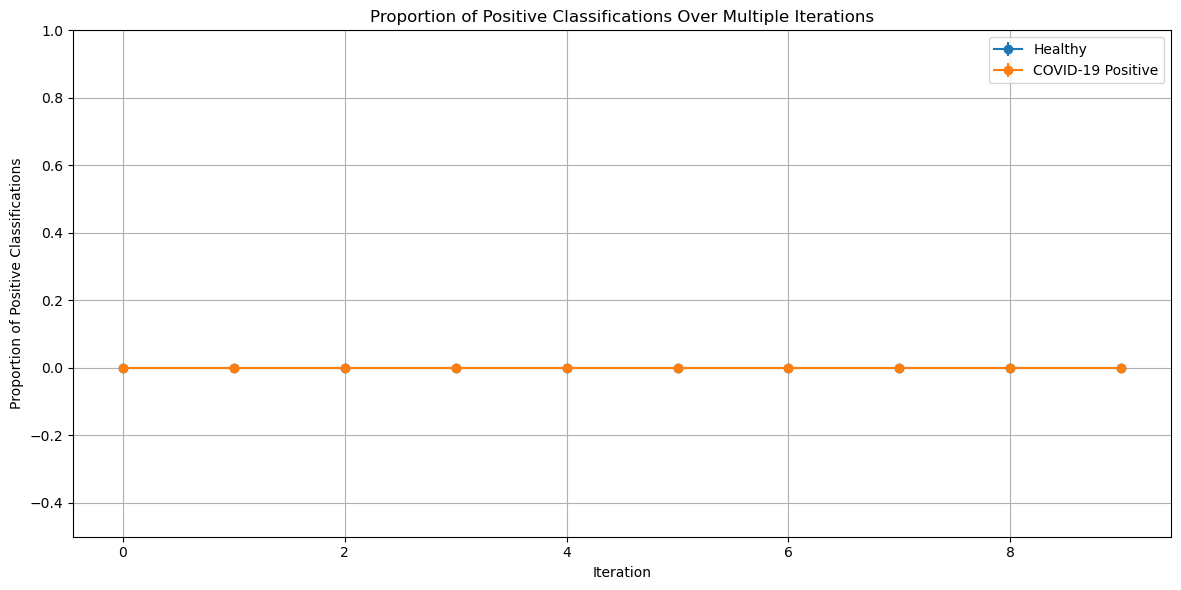

In [126]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have defined the 'analyze_folder_multiple_times' function as before

# Define parameters for analysis
num_iterations = 10  # More iterations for a clearer trend
adjusted_threshold = 100  # The optimal value needs to be determined based on your dataset

# Analyze each folder multiple times
# The results will now be the proportion of positive classifications per iteration
healthy_results = analyze_folder_multiple_times(healthy_folder_path, adjusted_threshold, num_random_images, num_iterations)
covid_results = analyze_folder_multiple_times(covid_folder_path, adjusted_threshold, num_random_images, num_iterations)

# Calculate the mean and standard deviation for visualization
healthy_mean = np.mean(healthy_results, axis=1)
healthy_std = np.std(healthy_results, axis=1)

covid_mean = np.mean(covid_results, axis=1)
covid_std = np.std(covid_results, axis=1)

# Create a plot with error bars to show variability
plt.figure(figsize=(12, 6))
plt.errorbar(range(num_iterations), healthy_mean, yerr=healthy_std, label='Healthy', fmt='-o')
plt.errorbar(range(num_iterations), covid_mean, yerr=covid_std, label='COVID-19 Positive', fmt='-o')

# Improve the visual appearance of the plot
plt.xlabel('Iteration')
plt.ylabel('Proportion of Positive Classifications')
plt.title('Proportion of Positive Classifications Over Multiple Iterations')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.ylim(-0.5, 1)  # Set the y-axis limits to [0, 1] to better see the differences
plt.show()



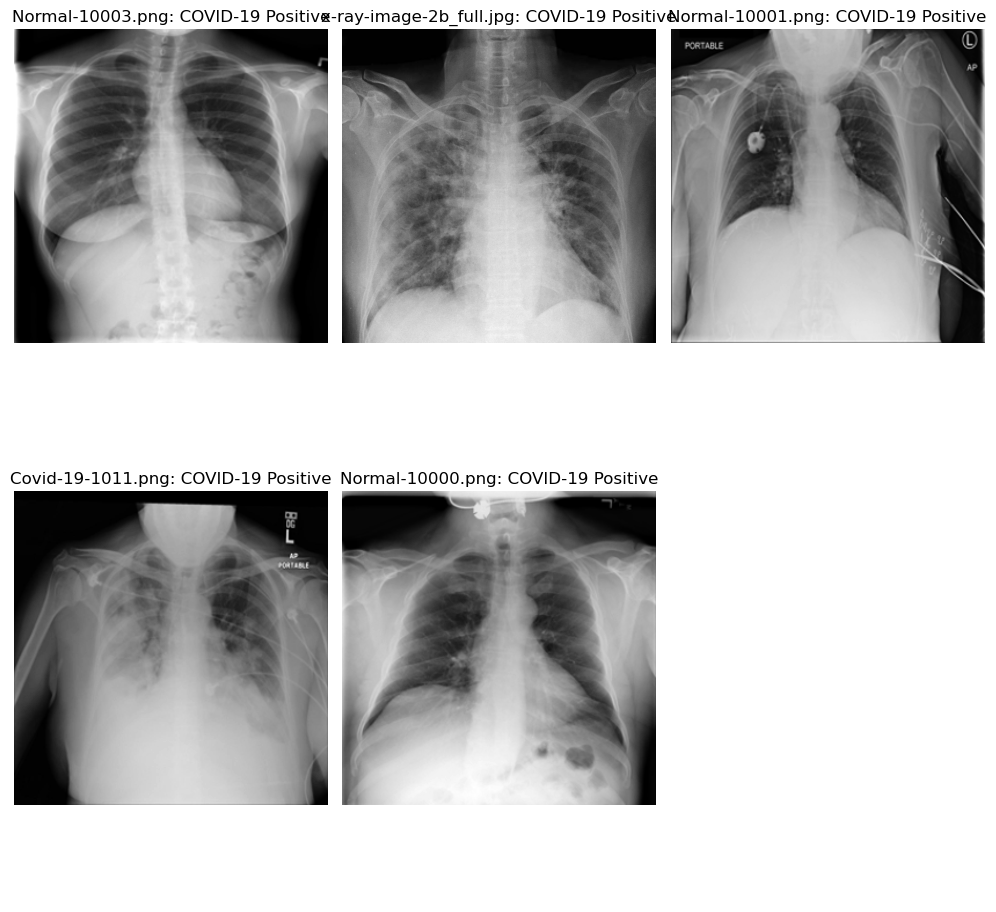

In [125]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

# # Function to load an image from a given path
# def load_image(path):
#     return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# # Function to calculate the mean intensity of the image
# def mean_intensity(image):
#     return np.mean(image)

# # Function to classify the image based on mean intensity
# def classify_image(image, threshold):
#     if mean_intensity(image) < threshold:  # Darker images have lower mean intensity
#         return "COVID-19 Positive"
#     else:
#         return "Healthy"

# # Function to select random images from a folder
# def select_random_images(folder_path, num_images, valid_extensions=(".jpg", ".jpeg", ".png")):
#     if not os.path.exists(folder_path):
#         print(f"Error: Folder '{folder_path}' does not exist.")
#         return []

#     all_files = [f for f in os.listdir(folder_path) if f.lower().endswith(valid_extensions)]
#     selected_files = random.sample(all_files, min(num_images, len(all_files)))
#     return [os.path.join(folder_path, f) for f in selected_files]


# Define number of images to process and folder paths
num_random_images = 5
random_images_path = "./RanDom Internet Images/Random"  # Update this path

# Select random images from the folder
random_image_paths = select_random_images(random_images_path, num_random_images)

# Define the intensity threshold (adjust based on experimentation)
intensity_threshold = 3000
 # Example value, adjust as needed

# Visualization
num_cols = 3
num_rows = (len(random_image_paths) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
axes = axes.flatten() if num_rows > 1 else [axes]

for i, image_path in enumerate(random_image_paths):
    image = load_image(image_path)
    if image is not None:
        classification = classify_image(image, intensity_threshold)

        ax = axes[i]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"{os.path.basename(image_path)}: {classification}")
        ax.axis('off')
    else:
        print(f"Warning: Unable to load image {image_path}")
        
# Remove any empty subplots
for i in range(len(random_image_paths), num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()
